# Regressões

## Regressão Linear Simples

Vamos começar inicialmente com a regressão linear simples. Note que existe o arquivo Salary_Data.csv nesta pasta, que é o arquivo que vamos trabalhar neste módulo.

Iremos realizar técnicas de pré-processamento de dados (modificações simples, o foco é em ML).

In [1]:
# Simple Linear Regression

# Importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
# Importando o dataset
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [6]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [4]:
# Dividindo em conjunto de treino e conjunto de testes
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431.])

In [9]:
# Criando o modelo de Regressão Linear
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(normalize = True)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [10]:
# Predizendo no conjunto de testes
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

In [11]:
from sklearn.metrics import r2_score

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("R2 de treino: {}".format(r2_train))
print("R2 de teste: {}".format(r2_test))

R2 de treino: 0.9411949620562126
R2 de teste: 0.988169515729126


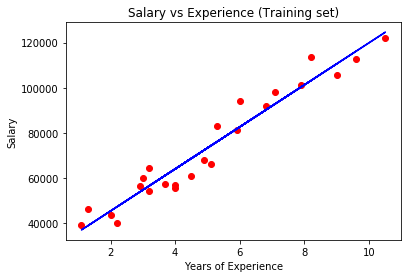

In [12]:
# Visualizando o modelo no conjunto de treino
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, y_pred_train , color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

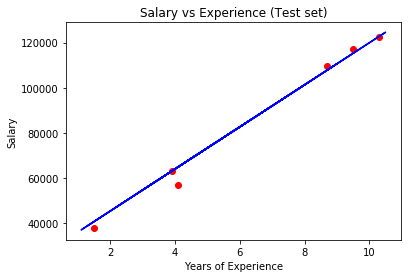

In [13]:
# Visualizando o modelo no conjunto de testes
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Regressão Linear Múltipla

Regressão Linear múltipla é semelhante à regressão linear simples, porém com mais de uma variável (regressor). O raciocínio (e o algoritmo) são os mesmos. Mudaremos apenas o dataset (50_Startups.csv)

In [14]:
# importando o dataset
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, 4]

In [15]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [16]:
#Tratando categorical data
X = pd.get_dummies(data = X)
X.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


In [17]:
# Evitando a Dummy Variable Trap
X.drop('State_California', axis=1, inplace=True)

In [18]:
X.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [19]:
# Dividindo em conjunto de treino e testes
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
X_train.shape

(40, 5)

In [21]:
X_test.shape

(10, 5)

In [22]:
# Criando o modelo de regressão linear múltipla
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
# Predizendo os resultados no test set
y_pred = regressor.predict(X_test)

In [24]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(mse)
r2 = r2_score(y_test, y_pred)
r2

83502864.03257759


0.9347068473282423

## Feature Selection

### F Test
Iremos utilizar f_regression para implementar o método de seleção de features F Test

In [25]:
# Calculando F e pval
from sklearn.feature_selection import f_regression
F, pval = f_regression(X_train, y_train)

# Excluindo features com baixo pval
X_train_ftest = X_train.iloc[:, pval < 0.05]
X_test_ftest = X_test.iloc[:, pval < 0.05]

In [26]:
X_train.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
33,55493.95,103057.49,214634.81,1,0
35,46014.02,85047.44,205517.64,0,1
26,75328.87,144135.98,134050.07,1,0
34,46426.07,157693.92,210797.67,0,0
18,91749.16,114175.79,294919.57,1,0


In [27]:
X_train_ftest.head()

,R&D Spend,Administration,Marketing Spend
33,55493.95,103057.49,214634.81
35,46014.02,85047.44,205517.64
26,75328.87,144135.98,134050.07
34,46426.07,157693.92,210797.67
18,91749.16,114175.79,294919.57


### Mutual Information 

Iremos utilizar mutual_info_regression para calcular implementar o método de seleção de features de Informação Mútua.

In [28]:
from sklearn.feature_selection import mutual_info_regression

mi = mutual_info_regression(X_train, y_train, random_state = 42)
mi

array([1.39802717, 0.        , 1.01259903, 0.        , 0.        ])

In [29]:
# Excluindo features com baixo mi
X_train_mi = X_train.iloc[:, mi > 0.5]
X_test_mi = X_test.iloc[:, mi > 0.5]

In [30]:
X_train_mi.head()

,R&D Spend,Marketing Spend
33,55493.95,214634.81
35,46014.02,205517.64
26,75328.87,134050.07
34,46426.07,210797.67
18,91749.16,294919.57


### Recursive Feature Elimination (RFE)

Iremos utilizar RFE para calcular implementar o método de seleção de features de Backwards Elimination.

In [31]:
from sklearn.feature_selection import RFE

X_train_rfe = RFE(estimator = regressor, n_features_to_select = 3)
X_train_rfe.fit(X_train, y_train)
X_train.iloc[:, X_train_rfe.support_].head()

,R&D Spend,State_Florida,State_New York
33,55493.95,1,0
35,46014.02,0,1
26,75328.87,1,0
34,46426.07,0,0
18,91749.16,1,0


Como conclusão, para este modelo específico, nota-se que a localização da startup (Flórida ou New York), e também a quantia gasta em R&D são as melhores features para aplicar ao modelo de regressão.

# Regressão Polinomial

Regressão polinomial é realizada quando existe uma dependência polinomial entre seus dados e seus rótulos.

In [32]:
# Importando o dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2]
y = dataset.iloc[:, 2]

In [33]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [34]:
X.head()

,Level
0,1
1,2
2,3
3,4
4,5


Para o intuito de visualização e teste, criaremos uma regressão linear em cima dos dados.

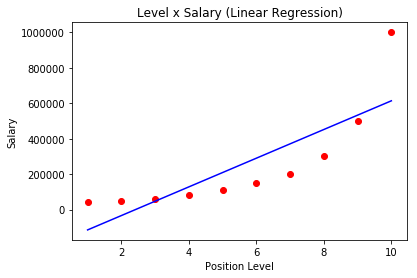

In [35]:
# Criando um modelo linear
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Visualização do modelo
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Level x Salary (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

Como é possível perceber, uma reta não é o melhor modelo para representar estes dados. A solução é adicionar termos polinomiais para melhor adequação da nossa curva.

In [36]:
# Criando o modelo de regressão polinomial - fornecer features polinomiais para LR
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 5)
X_poly = poly_reg.fit_transform(X)

In [37]:
pd.DataFrame(X_poly)

,0,1,2,3,4,5
0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,2.0,4.0,8.0,16.0,32.0
2,1.0,3.0,9.0,27.0,81.0,243.0
3,1.0,4.0,16.0,64.0,256.0,1024.0
4,1.0,5.0,25.0,125.0,625.0,3125.0
5,1.0,6.0,36.0,216.0,1296.0,7776.0
6,1.0,7.0,49.0,343.0,2401.0,16807.0
7,1.0,8.0,64.0,512.0,4096.0,32768.0
8,1.0,9.0,81.0,729.0,6561.0,59049.0
9,1.0,10.0,100.0,1000.0,10000.0,100000.0


In [38]:
# criando regressão polinomial
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Agora podemos perceber que existem features polinomiais nos nossos dados. Desta forma, basta aplicarmos LinearRegression.

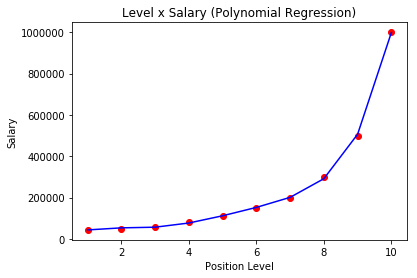

In [39]:
# Visualizaçãoo do modelo de regressção polinomial

#X_grid = np.arange(min(X), max(X), 0.1)
#X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(X_poly), color = 'blue')
plt.title('Level x Salary (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

# Decision Trees Regression

Árvores de decisão são utilizadas tanto para regressão, quanto para classificação. É muito comum ouvir o termo CART (Classification and Regression Trees). É um algoritmo intuitivo, onde o objetivo é criar um modelo que prediz um valor baseado em pequenas regras de decisão inferidas das features.


### Vantagens:
- Simples de entender e interpretar;
- Lida bem com dados numéricos e categóricos;
- Custo computacional logarítmico no número training examples.

### Desvantagens:
- Podem criar árvores muito complexas que não generalizam bem (overfitting);
- Instável, pequenas variações nos dados podem causar árvores completamente diferentes (problema resolvido com ensemble);
- É considerado um algoritmo NP-completo sob a óptica de otimização, usualmente os nós são otimizados encontrando-se mínimos locais (problema resolvido com ensemble);
- Muito influenciado por bias;

In [40]:
# Importando o dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [41]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [42]:
# Criando o modelo
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion = 'mse', random_state = 42)
regressor.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=42,
           splitter='best')

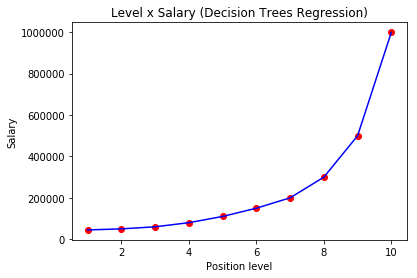

In [43]:
# Visualização do modelo
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue') # <- modelo de baixa resolução
plt.title('Level x Salary (Decision Trees Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

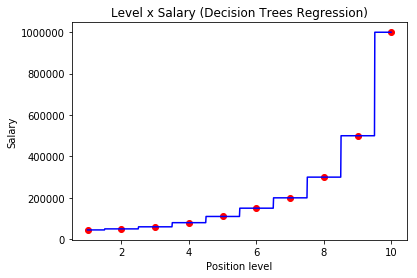

In [44]:
# Visualização com maior resolução
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Level x Salary (Decision Trees Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Veremos um outro exemplo, onde tentamos aproximar uma função senoidal.

In [45]:
# Criando dados aleatórios
rng = np.random.RandomState(42)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

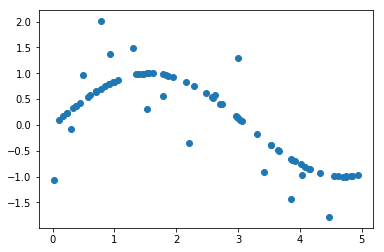

In [46]:
plt.scatter(X, y)

In [47]:
# Criando as árvores
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [48]:
# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

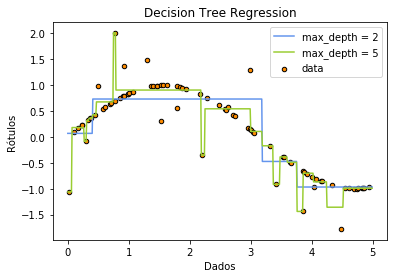

In [49]:
# Plotando os resultados
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",label="max_depth = 2")
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth = 5")
plt.xlabel("Dados")
plt.ylabel("Rótulos")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

É notável que para max_depth = 2 houve um fenômeno chamado Underfitting (ou High Bias), onde o modelo não é flexível o suficiente para generalizar bem para novos dados. Com max_depth = 5, temos um evento contrário à este, chamado Overfitting (ou High Variance), onde o modelo se dobra demais, também generalizando mal para novos dados.

<img src="overfit.png">






# Random Forest

Random Forest é um algoritmo do tipo ensemble. Algoritmos Ensemble são conhecidos por serem robustos à overfitting e por performarem bem para dados de teste, uma vez que utilizam modelos mais fracos (como árvores de decisão) para compor um modelo mais poderoso. 

Usualmente usam-se centenas de árvores de decisão para um ensemble de Random Forest. Também podem ser usados para classificação, e costumam extrair relações complexas entre os dados, criando árvores e mais árvores capazes de armazenar as decisões para dados com bastante densidade.

O processo de agrupamento dos resultados das árvores de decisão costuma anular o efeito de overfitting (semelhante à um sinal ruidoso, onde é possível cancelar o rúido pelo cálculo da média do sinal). Assim, tem-se um dos algoritmos mais poderosos.

In [50]:
# Importando o dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [51]:
# Criando o modelo
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(criterion = 'mse', n_estimators = 1000, random_state = 0, verbose = 2, n_jobs = 2)
regressor.fit(X, y)

building tree 1 of 1000
building tree 3 of 1000building tree 2 of 1000

building tree 4 of 1000building tree 5 of 1000

building tree 6 of 1000building tree 7 of 1000

building tree 8 of 1000building tree 9 of 1000

building tree 11 of 1000building tree 10 of 1000

building tree 12 of 1000building tree 13 of 1000

building tree 14 of 1000building tree 16 of 1000

building tree 15 of 1000building tree 19 of 1000

building tree 17 of 1000
building tree 18 of 1000building tree 21 of 1000

building tree 20 of 1000building tree 24 of 1000

building tree 22 of 1000building tree 27 of 1000

building tree 23 of 1000building tree 28 of 1000

building tree 25 of 1000building tree 31 of 1000

building tree 26 of 1000building tree 33 of 1000

building tree 29 of 1000building tree 34 of 1000

building tree 30 of 1000building tree 36 of 1000

building tree 32 of 1000building tree 38 of 1000

building tree 35 of 1000building tree 40 of 1000

building tree 37 of 1000
building tree 39 of 1000
building 

[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:    0.2s


building tree 337 of 1000

building tree 331 of 1000building tree 338 of 1000

building tree 332 of 1000building tree 341 of 1000

building tree 334 of 1000building tree 343 of 1000

building tree 336 of 1000building tree 344 of 1000

building tree 339 of 1000
building tree 346 of 1000building tree 340 of 1000

building tree 349 of 1000building tree 342 of 1000

building tree 351 of 1000building tree 345 of 1000

building tree 354 of 1000building tree 347 of 1000

building tree 357 of 1000building tree 348 of 1000

building tree 358 of 1000building tree 350 of 1000

building tree 360 of 1000building tree 352 of 1000

building tree 361 of 1000building tree 353 of 1000

building tree 364 of 1000building tree 355 of 1000

building tree 365 of 1000building tree 356 of 1000

building tree 368 of 1000building tree 359 of 1000

building tree 370 of 1000building tree 362 of 1000

building tree 372 of 1000building tree 363 of 1000

building tree 375 of 1000building tree 366 of 1000

building tr

[Parallel(n_jobs=2)]: Done 644 tasks      | elapsed:    0.4s




building tree 620 of 1000building tree 647 of 1000

building tree 624 of 1000building tree 648 of 1000

building tree 627 of 1000building tree 653 of 1000

building tree 629 of 1000building tree 655 of 1000

building tree 631 of 1000building tree 658 of 1000

building tree 634 of 1000building tree 659 of 1000

building tree 637 of 1000building tree 660 of 1000

building tree 638 of 1000building tree 663 of 1000

building tree 639 of 1000building tree 665 of 1000

building tree 641 of 1000building tree 666 of 1000

building tree 643 of 1000building tree 668 of 1000

building tree 645 of 1000building tree 670 of 1000

building tree 646 of 1000building tree 671 of 1000

building tree 649 of 1000building tree 673 of 1000

building tree 650 of 1000building tree 674 of 1000

building tree 651 of 1000building tree 676 of 1000

building tree 652 of 1000building tree 677 of 1000

building tree 654 of 1000building tree 680 of 1000

building tree 656 of 1000building tree 681 of 1000
building tr

[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.6s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=2, oob_score=False, random_state=0,
           verbose=2, warm_start=False)

[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 644 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.2s finished


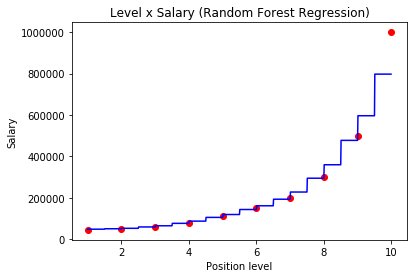

In [52]:
# Visualização do Random Forest Regression 
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Level x Salary (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Assim, pode-se perceber que o modelo foi melhorado. A diferença não é tão significante devido à natureza e simplicidade dos dados, porém para dados mais desafiadores este modelo costuma performar bem.